In [3]:
import datetime
import matplotlib.pyplot as plt
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

# Basic Forward Calculation

In [4]:
# set up our request
#
# all output parameters are default to False. Here we initialize 
# the output flags we want to get
output = pyaurorax.models.ATMForwardOutputFlags()  # initialize output flags, all will be False by default
output.enable_only_height_integrated_rayleighs()   # enable all height-integrated Rayleighs values
output.altitudes = True                            # enable altitudes
output.emission_5577 = True                        # enable the 5577nm emission

# set the location (Calgary-ish)
#
# NOTE: ATM forward calculations can be performed 
# for any latitude or longitude
latitude = 51.04
longitude = -114.5

# set the timestamp to UT06 of the previous day
#
# NOTE: ATM forward calculations can be performed for any date up 
# to the end of the previous day. It is expected to be in UTC time, 
# and any timezone data will be ignored. 
timestamp = datetime.datetime.now().replace(hour=6, minute=0, second=0, microsecond=0) - datetime.timedelta(days=1)

In [5]:
# perform the calculation
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

# view the output
# 
# we use handy print method for the results
result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : None
  emission_1356                        : None
  emission_4278                        : None
  emission_5577                        : array([9.72542875e-06, 4.63875076e-05, 4.47856582e-04, 4.463 ...])
  emission_6300                        : None
  emission_8446                        : None
  emission_lbh                         : None
  height_integrated_rayleighs_1304     : 1283.141350
  height_integrated_rayleighs_1356     : 218.736472
  height_integrated_rayleighs_4278     : 2765.693660
  height_integrated_rayleighs_5577     : 16642.590201
  height_integrated_rayleighs_6300     : 379.060374
  height_integrated_rayleighs_8446     : 476.980016
  height_integrated_rayleighs_lbh      : 15218.480492
  neutral_n2_density                   : None
  neutral_n_density                    : None
  neutral_o2_density        

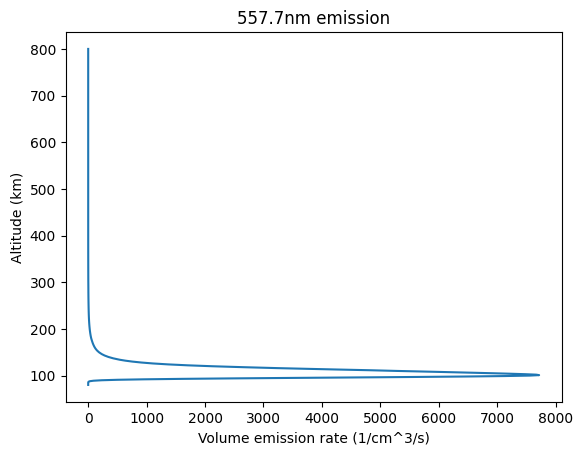

In [6]:
# plot the 557.7nm emission data
plt.title("557.7nm emission")
plt.xlabel("Volume emission rate (1/cm^3/s)")
plt.ylabel("Altitude (km)")
plt.plot(result.emission_5577, result.altitudes)
plt.show()

# Do a request with all output parameters

In [8]:
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

output = pyaurorax.models.ATMForwardOutputFlags()
output.set_all_true()

result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : array([4.11610381e-06, 8.14978193e-06, 8.05713353e-05, 6.028 ...])
  emission_1356                        : array([6.52554263e-07, 1.36533311e-06, 1.35077644e-05, 1.010 ...])
  emission_4278                        : array([3.60688828e-02, 2.65546776e-02, 9.94128808e-02, 2.800 ...])
  emission_5577                        : array([1.80875533e-04, 1.10980112e-03, 1.33010345e-02, 1.544 ...])
  emission_6300                        : array([4.59703074e-07, 4.37639130e-07, 1.82654117e-06, 6.446 ...])
  emission_8446                        : array([1.50578364e-06, 3.01059140e-06, 2.97776405e-05, 2.228 ...])
  emission_lbh                         : array([1.90615952e-01, 1.61396325e-01, 6.04281723e-01, 1.702 ...])
  height_integrated_rayleighs_1304     : 1351.555528
  height_integrated_rayleighs_1356     : 230.423250
  height_inte

Height-integrated Rayleighs:
  427.8nm:  2501.37 R
  557.7nm:  15461.35 R
  630.0nm:  252.66 R
  844.6nm:  501.97 R
  LBH:      15266.78 R
  130.4nm:  1351.56 R
  135.6nm:  230.42 R


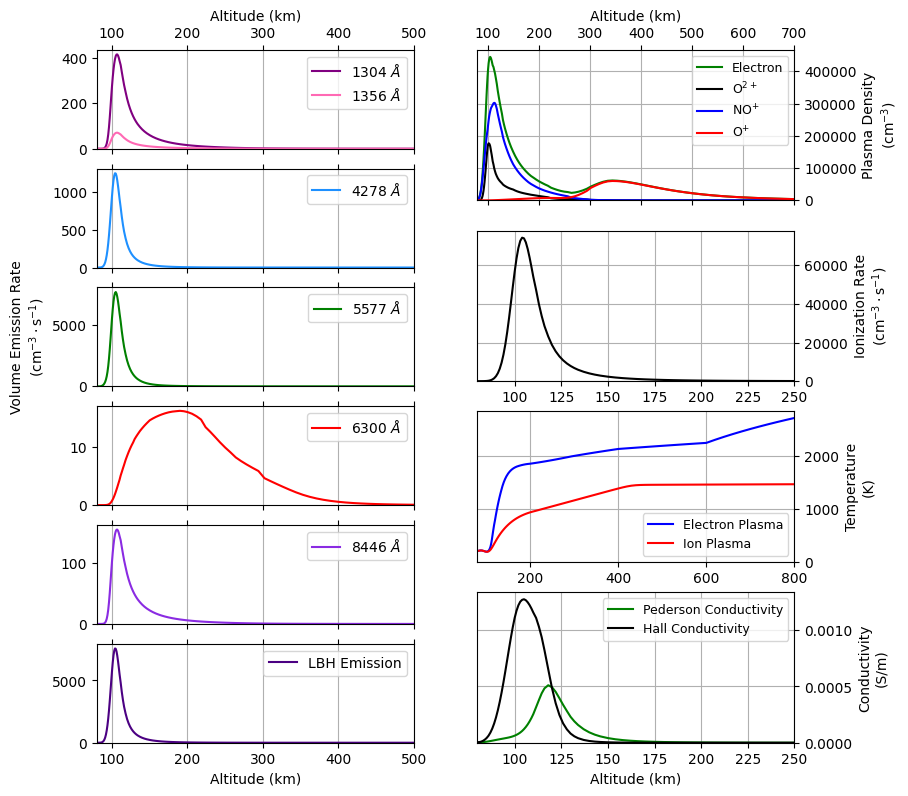

In [9]:
# let's show everything we got back
#
# print all height-integrated Rayleighs data
print("""Height-integrated Rayleighs:
  427.8nm:  %.02f R
  557.7nm:  %.02f R
  630.0nm:  %.02f R
  844.6nm:  %.02f R
  LBH:      %.02f R
  130.4nm:  %.02f R
  135.6nm:  %.02f R""" % (result.height_integrated_rayleighs_4278,
                          result.height_integrated_rayleighs_5577,
                          result.height_integrated_rayleighs_6300,
                          result.height_integrated_rayleighs_8446,
                          result.height_integrated_rayleighs_lbh,
                          result.height_integrated_rayleighs_1304,
                          result.height_integrated_rayleighs_1356))

# plot the emission, plasma, and neutral data
#
# we'll do this all in one plot, but made up from many subplots
alt = result.altitudes
fig = plt.figure(figsize=(9,9))

# plot all the emissions as a column of subplots
# 
# 1304 A & 1356 A emission
ax1 = fig.add_subplot(6,2,1)
ax1.plot(alt, result.emission_1304, label=r"1304 $\AA$", color="purple")
ax1.plot(alt, result.emission_1356, label=r"1356 $\AA$", color="hotpink")
ax1.legend()
ax1.set_xlim(80,500)
ax1.set_ylim(bottom=0)
ax1.grid(axis="x")
ax1.set_xlabel("Altitude (km)", va="bottom")
ax1.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax1.xaxis.set_label_position("top")

# blueline emission
ax2 = fig.add_subplot(6,2,3)
ax2.plot(alt, result.emission_4278, label=r"4278 $\AA$", color="dodgerblue")
ax2.legend()
ax2.set_xlim(80,500)
ax2.set_ylim(bottom=0)
ax2.grid(axis="x")
ax2.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# greenline emission
ax3 = fig.add_subplot(6,2,5)
ax3.plot(alt, result.emission_5577, label=r"5577 $\AA$", color="green")
ax3.legend()
ax3.set_xlim(80,500)
ax3.set_ylim(bottom=0)
ax3.grid(axis="x")
ax3.set_ylabel("Volume Emission Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax3.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# redline emission
ax4 = fig.add_subplot(6,2,7)
ax4.plot(alt, result.emission_6300, label=r"6300 $\AA$", color="red")
ax4.legend()
ax4.set_xlim(80,500)
ax4.set_ylim(bottom=0)
ax4.grid(axis="x")
ax4.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# near-infrared 8446 A emission
ax5 = fig.add_subplot(6,2,9)
ax5.plot(alt, result.emission_8446, label=r"8446 $\AA$", color="blueviolet")
ax5.legend()
ax5.set_xlim(80,500)
ax5.set_ylim(bottom=0)
ax5.grid(axis="x")
ax5.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# Lyman-Birge-Hopfield emission
ax6 = fig.add_subplot(6,2,11)
ax6.plot(alt, result.emission_lbh, label="LBH Emission", color="indigo")
ax6.legend()
ax6.set_xlim(80,500)
ax6.set_ylim(bottom=0)
ax6.grid(axis="x")
ax6.set_xlabel("Altitude (km)")
ax6.tick_params(axis="x", bottom=True, top=True)

# plot the plasma data as a second column of subplots
#
# plasma density
ax7 = fig.add_subplot(4,2,2)
ax7.plot(alt, result.plasma_electron_density, label="Electron", color="green")
ax7.plot(alt, result.plasma_o2plus_density, label="O$^{2+}$", color="black")
ax7.plot(alt, result.plasma_noplus_density, label="NO$^{+}$", color="blue")
ax7.plot(alt, result.plasma_oplus_density, label="O$^{+}$", color="red")
ax7.grid()
ax7.set_ylabel("Plasma Density\n(cm$^{-3}$)")
ax7.legend(fontsize=9)
ax7.set_xlim(80,700)
ax7.set_ylim(bottom=0)
ax7.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax7.set_xlabel("Altitude (km)")
ax7.xaxis.set_label_position("top")
ax7.yaxis.set_label_position("right")
ax7.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma ionisation rate
ax8 = fig.add_subplot(4,2,4)
ax8.plot(alt, result.plasma_ionisation_rate, color="black")
ax8.grid()
ax8.set_ylabel("Ionization Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax8.set_xlim(80,250)
ax8.set_ylim(bottom=0)
ax8.yaxis.set_label_position("right")
ax8.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma temperatures
ax9 = fig.add_subplot(4,2,6)
ax9.plot(alt, result.plasma_electron_temperature, label="Electron Plasma", color="blue")
ax9.plot(alt, result.plasma_ion_temperature, label="Ion Plasma", color="red")
ax9.grid()
ax9.legend(fontsize=9)
ax9.set_ylabel("Temperature\n(K)")
ax9.set_xlim(80,800)
ax9.set_ylim(bottom=0)
ax9.yaxis.set_label_position("right")
ax9.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma conductivities
ax10 = fig.add_subplot(4,2,8)
ax10.plot(alt, result.plasma_pederson_conductivity, label="Pederson Conductivity", color="green")
ax10.plot(alt, result.plasma_hall_conductivity, label="Hall Conductivity", color="black")
ax10.grid()
ax10.legend(fontsize=9)
ax10.set_ylabel("Conductivity\n(S/m)")
ax10.set_xlim(80,250)
ax10.set_ylim(bottom=0)
ax10.set_xlabel("Altitude (km)")
ax10.yaxis.set_label_position("right")
ax10.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# render the plot
plt.show()